Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5694 - loss: 0.8411 - val_accuracy: 0.5507 - val_loss: 0.6872
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5449 - loss: 0.7456 - val_accuracy: 0.6522 - val_loss: 0.6378
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6010 - loss: 0.6878 - val_accuracy: 0.6957 - val_loss: 0.6037
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6827 - loss: 0.6110 - val_accuracy: 0.7101 - val_loss: 0.5789
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6621 - loss: 0.6256 - val_accuracy: 0.7681 - val_loss: 0.5594
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6909 - loss: 0.6027 - val_accuracy: 0.7681 - val_loss: 0.5415
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7486 - loss: 0.5667 - val_accuracy: 0.7826 - val_loss: 0.5239
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7480 - loss: 0.5450 - val_accuracy: 0.7971 - 

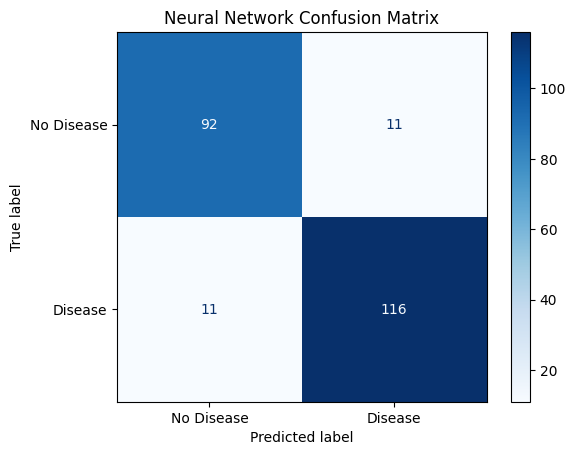

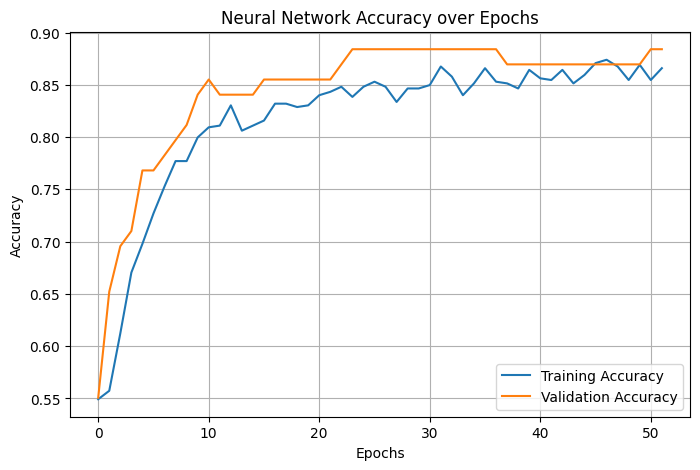

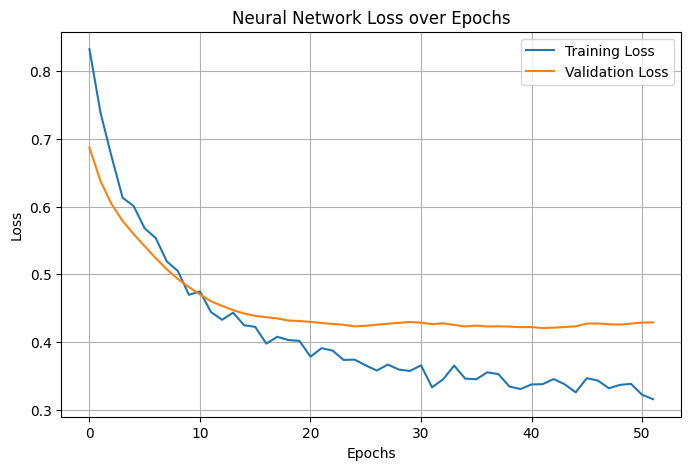


Train vs Test Performance:
Train Accuracy: 0.8735 | Train Loss: 0.3058
Test Accuracy : 0.9043 | Test Loss : 0.3024


In [1]:
# ============================================================
# Heart Disease Decision Support Agent
# Neural Network (Multi-Layer Perceptron) Pipeline
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ------------------------------------------------------------
# 1. Data Loading
# ------------------------------------------------------------
# Load the heart disease dataset.
# The target variable 'HeartDisease' indicates whether
# a patient is at risk (1) or not (0).
data = pd.read_csv("heart.csv")

# ------------------------------------------------------------
# 2. Feature–Target Separation
# ------------------------------------------------------------
# Separate input features (X) and target variable (y).
X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

# ------------------------------------------------------------
# 3. Categorical Feature Encoding
# ------------------------------------------------------------
# Convert categorical variables into numerical format
# using one-hot encoding.
categorical_cols = X.select_dtypes(include=["object"]).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# ------------------------------------------------------------
# 4. Train–Test Split
# ------------------------------------------------------------
# Split the dataset into training and testing sets.
# Stratification preserves class distribution.
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# ------------------------------------------------------------
# 5. Feature Scaling
# ------------------------------------------------------------
# Standardization is required for Neural Networks
# to ensure stable and efficient training.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# 6. Neural Network Architecture
# ------------------------------------------------------------
# The model consists of fully connected layers with
# ReLU activation and Dropout regularization to
# reduce overfitting.
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(8, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

# ------------------------------------------------------------
# 7. Model Compilation
# ------------------------------------------------------------
# Binary cross-entropy is used for binary classification,
# optimized using the Adam optimizer.
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# ------------------------------------------------------------
# 8. Model Training
# ------------------------------------------------------------
# Early stopping is applied to prevent overfitting
# by monitoring validation loss.
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# ------------------------------------------------------------
# 9. Model Evaluation
# ------------------------------------------------------------
# Generate predictions on the test set.
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Compute evaluation metrics.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nNeural Network Performance Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

# ------------------------------------------------------------
# 10. Confusion Matrix Visualization
# ------------------------------------------------------------
# Visual comparison between true and predicted labels.
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=["No Disease", "Disease"],
    cmap="Blues"
)
plt.title("Neural Network Confusion Matrix")
plt.show()

# ------------------------------------------------------------
# 11. Training History Visualization
# ------------------------------------------------------------
# Accuracy over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 12. Model Persistence
# ------------------------------------------------------------
# Save the trained model and scaler for deployment.
os.makedirs("model", exist_ok=True)
model.save("model/heart_model.keras")
joblib.dump(scaler, "model/scaler.pkl")

# ------------------------------------------------------------
# 13. Train vs Test Performance Check
# ------------------------------------------------------------
# Compare training and testing performance
# to detect potential overfitting.
train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)

print("\nTrain vs Test Performance:")
print(f"Train Accuracy: {train_acc:.4f} | Train Loss: {train_loss:.4f}")
print(f"Test Accuracy : {test_acc:.4f} | Test Loss : {test_loss:.4f}")
